Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

## 1.1 Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from scipy import stats as st

In [2]:
# pip install pyspark

In [3]:
# from pyspark import SparkContext
# from pyspark.sql import SparkSession

## 1.2 Импорт данных и изучение 

In [4]:
data_q1 = pd.read_csv('/datasets/query_1.csv')
data_q3 = pd.read_csv('/datasets/query_3.csv') 
data_last = pd.read_csv('/datasets/query_last.csv')

__Оценим данные в запросе 1__

In [5]:
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
display(data_q1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


__Оценим данные в запросе 3__

In [7]:
data_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
display(data_q3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<div style="border:solid black 2px; padding: 20px">
<b> Промежуточный вывод: </b>
    <p> В обоих запросах типы данных указаны корректно, пропусков также нет. </p>

__Альтернативно с помощью pyspark__

Выдает ошибку: [Errno 2] No such file or directory: '/opt/spark-2.4.5-bin-hadoop2.7/./bin/spark-submit': '/opt/spark-2.4.5-bin-hadoop2.7/./bin/spark-submit'

Я так понял, что здесь spark не используем в этом проекте и pyspark не установлен, что наталкивает меня на мысль мы тут без него обходимся. Засетапить RDD не получается и легче обычным pandas обойтись...

__Выберем топ-10 городов по количеству рейсов__

In [9]:
cities_top10 = data_q3.sort_values(by = 'average_flights', ascending=False).head(10)
cities_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


__Строим графики__

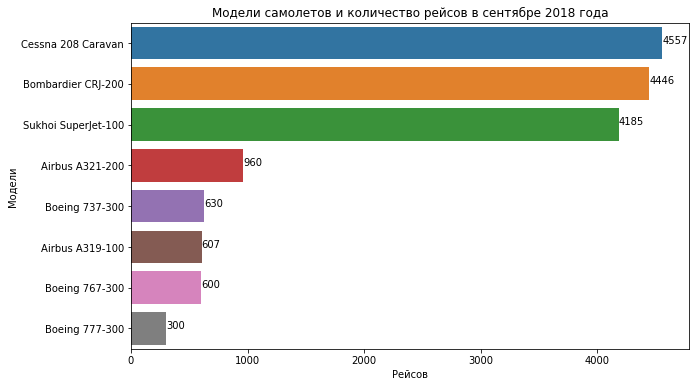

In [10]:
data_q1 = data_q1.sort_values(by='flights_amount', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Модели самолетов и количество рейсов в сентябре 2018 года")
sns.barplot(y=data_q1['model'], x=data_q1['flights_amount'])
plt.ylabel("Модели")
plt.xlabel("Рейсов")

for i in range(len(data_q1)):
    plt.text(data_q1.values[i][1], i, data_q1.values[i][1])

<div style="border:solid black 2px; padding: 20px">
<b> Промежуточный вывод: </b>
    <p> В сентябре 2018 года больше всего рейсов приходилось на небольшие самолеты Cessna 208 и Bombardier и далее по убыванию от Sukhoi до Boeing. </p>

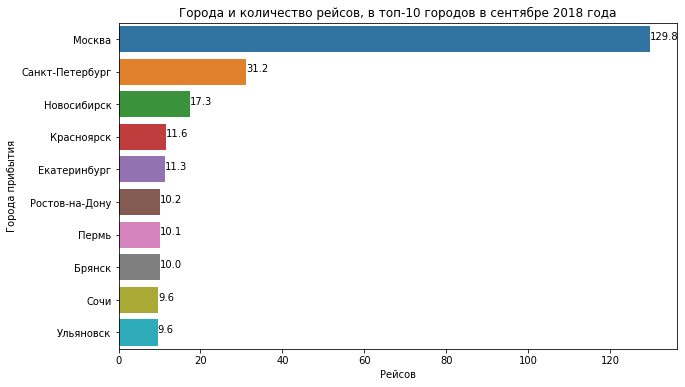

In [11]:
cities_top10 = cities_top10.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Города и количество рейсов, в топ-10 городов в сентябре 2018 года")
sns.barplot(y=cities_top10['city'], x=cities_top10['average_flights'])
plt.ylabel("Города прибытия")
plt.xlabel("Рейсов")

for i in range(len(cities_top10)):
    plt.text(cities_top10.values[i][1], i, round(cities_top10.values[i][1],1))

<div style="border:solid black 2px; padding: 20px">
<b> Промежуточный вывод: </b>
    <p> В сентябре 2018 года больше всего рейсов было в большие города миллионники. </p>

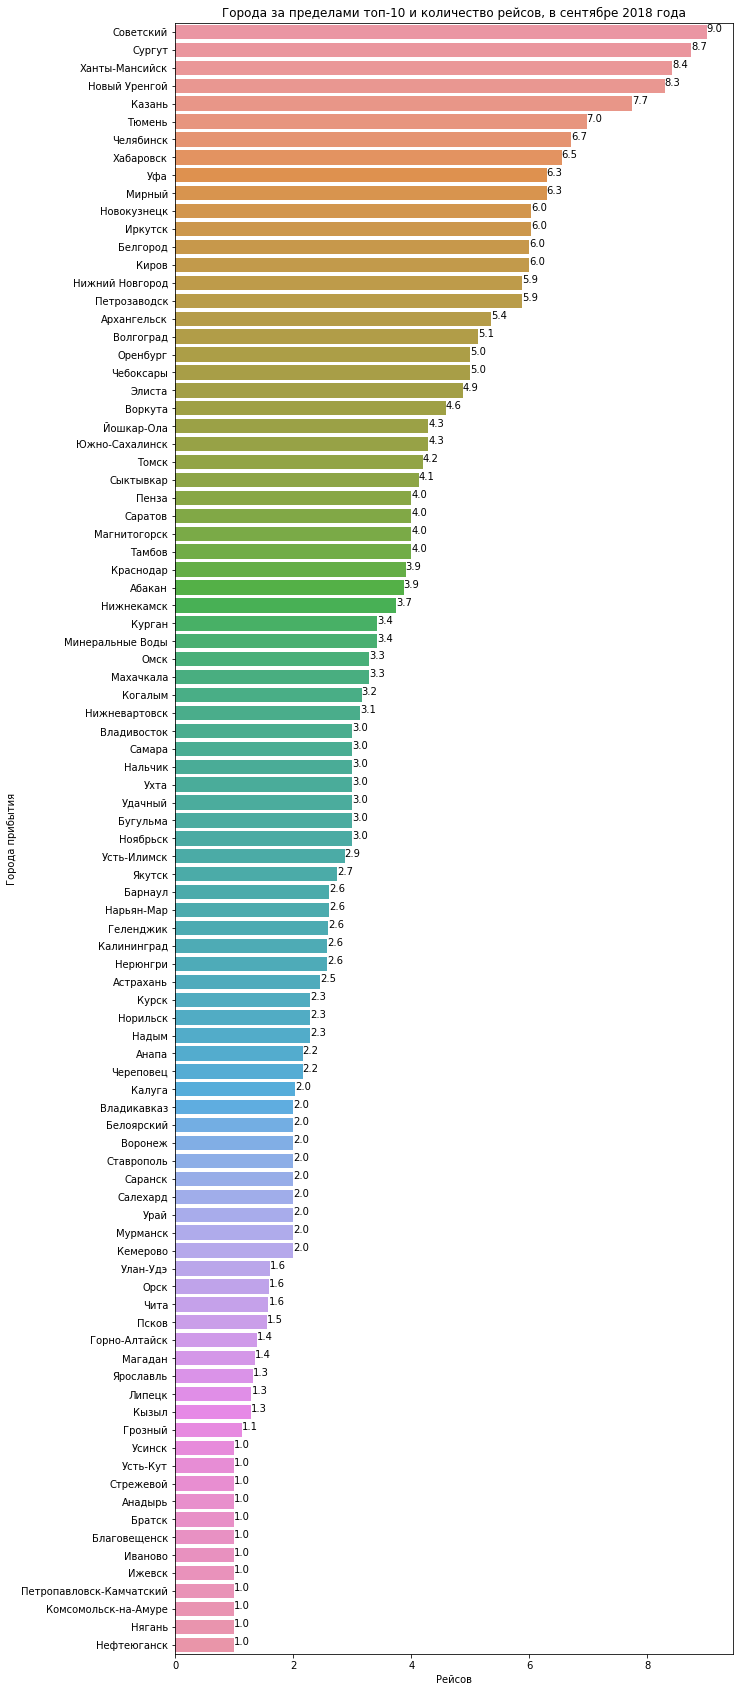

In [12]:
data_q3 = data_q3.sort_values(by='average_flights', ascending=False)
cit_list = list(cities_top10['city'])

plt.figure(figsize=(10,30))
plt.title("Города за пределами топ-10 и количество рейсов, в сентябре 2018 года")
sns.barplot(y=data_q3.query("city not in @cit_list")['city'],x=data_q3.query("city not in @cit_list")['average_flights'])
plt.ylabel("Города прибытия")
plt.xlabel("Рейсов")

for i in range(len(data_q3.query("city not in @cit_list"))):
    plt.text(data_q3.query("city not in @cit_list").values[i][1], i, round(data_q3.query("city not in @cit_list").values[i][1],1))

<div style="border:solid black 2px; padding: 20px">
<b> Промежуточный вывод: </b>
    <p> В сентябре 2018 года за пределами топ-10 городов рейсов больше всего было в отдаленных городах Сибири. </p>

# 2. Проверка гипотезы

__Гипотеза: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время__

Сформулируем гипотезы так:
- H0: Среднее количество проданных билетов за фестивальную = Среднее количество проданных билетов за неделю вне фестиваля
- H1: Среднее количество проданных билетов за фестивальную != Среднее количество проданных билетов за неделю вне фестиваля

Используем "гипотезу о равенстве средних двух генеральных совокупностей"

In [13]:
ALPHA = 0.05

__Найдем средний спрос на билеты в фестивальные и не фестивальные недели Москвы__

In [14]:
display(data_last.query('festival_name.isna() == False'))

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [15]:
display(data_last.query('festival_name.isna() == True'))

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [16]:
average_fest_week = data_last.query('festival_name.isna() == False')['ticket_amount']
average_non_fest_week = data_last.query('festival_name.isna() == True')['ticket_amount']

__Оценим распределение__

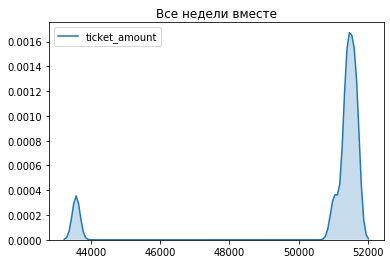

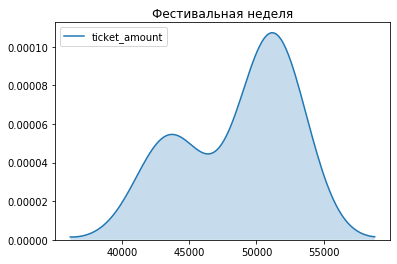

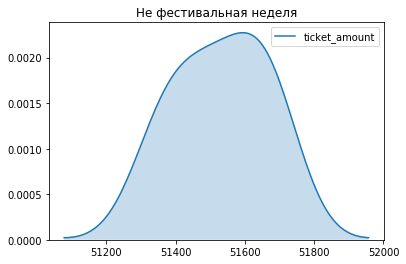

In [17]:
sns.kdeplot(data=data_last['ticket_amount'], shade=True)
plt.title("Все недели вместе")
plt.show()
sns.kdeplot(data=average_fest_week, shade=True)
plt.title("Фестивальная неделя")
plt.show()
sns.kdeplot(data=average_non_fest_week, shade=True)
plt.title("Не фестивальная неделя")
plt.show()

In [18]:
result_hyp_1 = st.mannwhitneyu(average_fest_week, average_non_fest_week, alternative='two-sided')

In [19]:
print("p-значение: ", result_hyp_1.pvalue)
if result_hyp_1.pvalue < ALPHA/2: #поскольку критерий двусторонний
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  0.06824748837800128
Не можем отвергнуть нулевую гипотезу


<div style="border:solid black 2px; padding: 20px">
<b> Промежуточный вывод: </b>
    <p> Средние продажи билетов по недялям распределены разным образом, поэтому используем параметр equal_var=False. По результатам стат-теста по критерию Стьюдента мы не можем отвергнуть нулевую гипотезу. У нас есть ~38% вероятности, что спрос не отличается в недели с фестивалями и без. </p>

<div style="border:solid black 2px; padding: 20px">
<b> Промежуточный вывод_v2: </b>
    <p> Николай, как ты и показал, делаю ремарку, что данных мало и корректные выводы сделать сложно на столь небольших данных. Тем не менее применив критерий Манна-Уитни, мы получаем результат, что спрос скорее всего не отличается в недели с фестивалями и без, поскольку нулевую гипотезу отвергнуть не можем при данном уровне ALPHA = 5%. </p>